Carga de librerías

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd
import matplotlib.pyplot as plt

Definición de rutas relativas del archivo para carga de datos

In [2]:
# Paths relativos de archivo
ROOT = os.path.dirname(os.getcwd())
data_path = os.path.join(ROOT, 'data', 'Data pt1')

# Proyecciones cartográficas

Las proyecciones cartográficas surgen de la necesidad de representar a la tierra, que es un objeto esférico en 3 dimensiones, en un plano en dos dimensiones. Como respuesta surgió el _Geographic Coordinate System_ (**CGS**), que ayuda a definir ubicaciones sobre la superficie de la Tierra basado en la longitud y latitud de la ubicación:

* **Longitud**: Son las líneas que recorren de Norte a Sur a la Tierra, y que puedo tomar valores de 0° a +180° para el Este, y de 0° a -180° para el Oeste
* **Latitud**: Son las líneas que recorren de Este a Oeste a la Tierra, y que pueden tomar valores de 0° a +90° para el hemisferio norte, y de 0° a -90° para el hemisfero sur

Debido a que existen diversos modelos de la Tierra, también existen diversas versiones de CGS siendo la WGS84 el estándar internacional más preciso hoy en día. En función de la región de la Tierra en la que se esté enfocando un determinado análisis será la elección de la proyección cartógráfica, también conocidad como _Projected Coordinate System_ (**PCS**)

Para ilustrarlo, se hará la proyección de un mismo conjunto de datos utilizando diferentes proyecciones cartográficas:

In [3]:
# Shapefile de datos globales
world  = gpd.read_file(
    filename=gpd.datasets.get_path("naturalearth_lowres"))

# Shapefile de capitales
capitals = gpd.read_file(
    filename=os.path.join(data_path, 'ne_110m_populated_places', 'ne_110m_populated_places.shp'))
capitals = capitals[capitals["FEATURECLA"]=="Admin-0 capital"]

# Shapefile de 
grat = gpd.read_file(
    filename=os.path.join(data_path, 'Graticule', 'ne_110m_graticules_10.shp'))

C:\Users\Miguel\AppData\Local\Temp\ipykernel_24824\4161857168.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  filename=gpd.datasets.get_path("naturalearth_lowres"))


Ahora se filtran los datos para hacer sentido espacial:

In [4]:
world_mask = world[world['continent'].isin(['Oceania','Africa','Asia','Europe'])]

## Proyección de áreas iguales

Esta proyección mantiene el tamaño relativo de un área a lo largo del mapa, lo que significa que para cualquier región dada en el mapa y sus características, estas respetarán su tamaño real

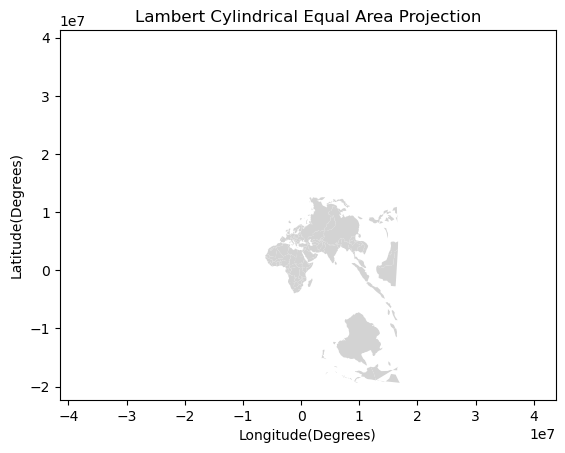

In [5]:
# Datos de visualización
world_9834 = world_mask.to_crs(crs='EPSG:9834')

# Especificaciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_9834.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="Lambert Cylindrical Equal Area Projection")
plt.axis('equal')

plt.show()

## Proyección sinusoidal

Es una proyección pseudo-cilíndrica que despliega todos los paralelos así como el meridiano central en su escala real. Dado que los paralelos en los extremos de la Tierra son más pequeños que en el ecuador, esto resulta en una mayor distorsión en los polos

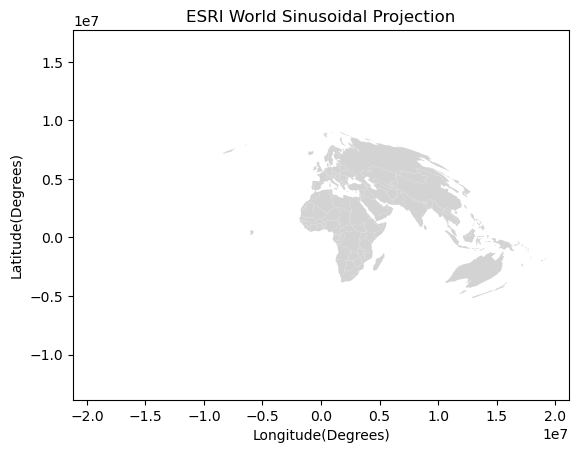

In [6]:
# Datos de visualización
world_3857 = world_mask.to_crs(crs='ESRI: 54008')

# Especificaciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_3857.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="ESRI World Sinusoidal Projection")
plt.axis('equal')
    
plt.show()

## Proyección Mercator

Es una proyección cilíndrica que hace que los paralelos y meridianos se intersecten de modo que formen rectángulos. En esta proyección, los meridianos son líneas verticales y los paralelos son líneas horizaontales

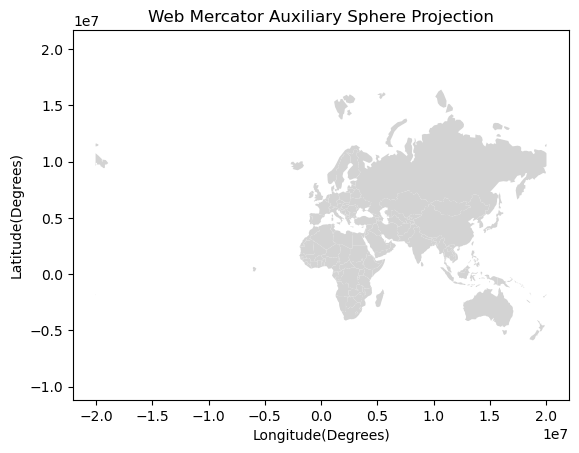

In [7]:
# Datos de visualización
world_3857 = world_mask.to_crs(crs='EPSG:3857')

# Configuraciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_3857.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="Web Mercator Auxiliary Sphere Projection")
plt.axis('equal')

plt.show()

## Proyección cónica equidistante

Una proyección equidastante es aquella que mantiene la escala a lo largo de una o múltiples líneas. Se usa comunmente para producir mapas de países que son muy pequeños, o aquellos que abarquen grandes distancias de Este a Oeste a lo largo de la Tierra.

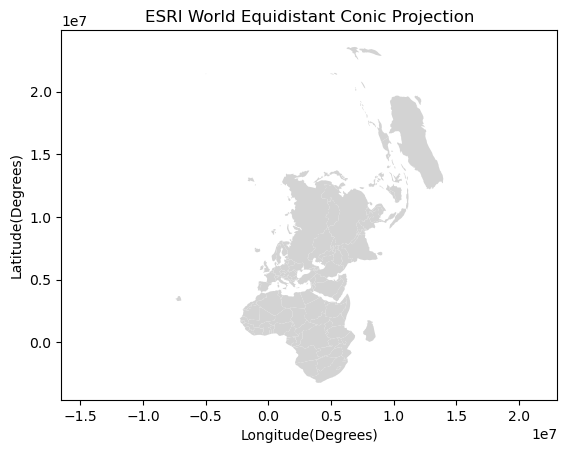

In [8]:
# Datos de visualización
world_54027 = world_mask.to_crs(crs='ESRI:54027')

# Configuraciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_54027.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="ESRI World Equidistant Conic Projection")
plt.axis('equal')

plt.show()

## Proyección equidistante azimutal

Una proyección azimutal es aquella que mantiene una dirección dada de un putno central, distorsionando la escala misma que sólo es la escala verdadera a lo largo de las direcciones que se están proyectando. 

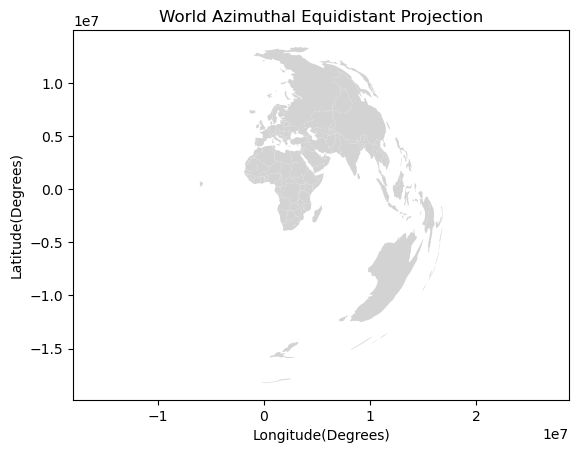

In [9]:
# Datos de visualización
world_54032 = world_mask.to_crs(crs='ESRI:54032')

# Configuraciones de figura
fig, ax = plt.subplots()

# Elementos de visualización
world_54032.plot(ax=ax, color="lightgray")

# Anotaciones y estilo
ax.set(
    xlabel="Longitude(Degrees)"
    ,ylabel="Latitude(Degrees)"
    ,title="World Azimuthal Equidistant Projection")
plt.axis('equal')

plt.show()

# Hands on with Geopandas

Geopandas es una extensión de `pandas` que incorpora tipos de datos adicionales para el manejo de datos geoespaciales, además de incorporar funciones optimizadas para resolver operaciones espaciales.

Lo primero que se debe hacer siempre es verificar el **sistema de coordenadas de referencia**. En este caso, se puede llamar el atributo de clase `crs` para verificar la información:

In [10]:
# Información de CRS
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Este comando contiene metadatos importantes del archivo geoespacial que estoy incorporando, por ejemplo:

* El **CRS** utilizado es el **WGS84**
* La proyección cartográfica es la **EPSG 4326**
* El meridiano de referencia es el de Greenwich

Independientemente del **CRS** que se utilice, todos los conjuntos de datos que se vayan a incorporar al análisis deben estar en la misma proyección cartográfica:

In [11]:
# Verificar CRS en shapefiles
world.crs == capitals.crs == grat.crs

True

En este caso se satisface que los tres conjuntos están en el mismo sistema de referencia, con lo cual se puede empezar a trabajar con los datos sin preocupaciones, por ejemplo, para hacer un mapa que contenga la información de tosos los conjuntos:

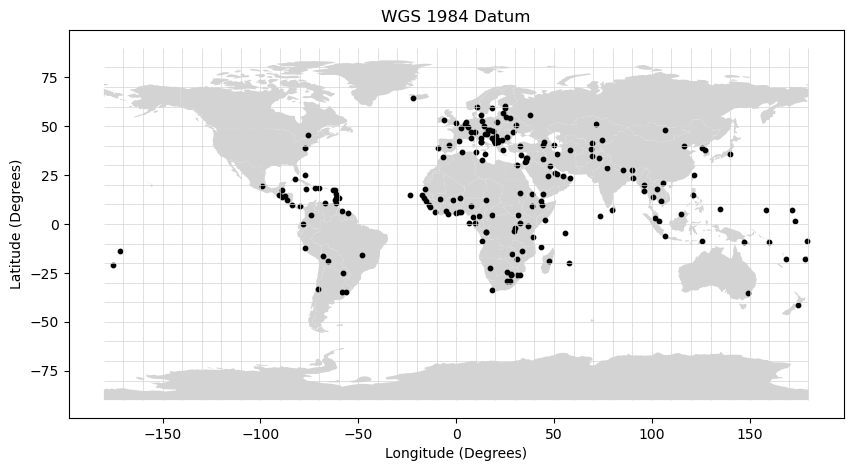

In [12]:
# Especificaciones de figura
fig, ax = plt.subplots(figsize=(10,8))

# Elementos de visualziación
world.plot(ax=ax, color="lightgray")
capitals.plot(ax=ax, color="black", markersize=10, marker ="o")
grat.plot(ax=ax, color="lightgray", linewidth=0.5)

# Anotaciones y estilo
ax.set(
    xlabel="Longitude (Degrees)"
    ,ylabel="Latitude (Degrees)"
    ,title="WGS 1984 Datum")

plt.show()

## Cambio de proyección

Si tienes la necesidad de trabajar con una proyección distinta, entonces necesitas asegurar que el cambio de proyección se efectúe en todos los _shapefile_. En este caso, se utilizará una proyección azimutal con código `ESRI: 54032`.

In [13]:
# Cambio de CRS
world_ae = world.to_crs(crs="ESRI:54032")
graticules_ae = grat.to_crs(crs="ESRI:54032")

Nuevamente, se debe verificar que el cambio de proyección haya sido exitoso

In [14]:
print(f"Mismo CRS: {world_ae.crs == graticules_ae.crs}\n")
world_ae.crs

Mismo CRS: True



<Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Azimuthal_Equidistant
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Observa que el sistema de referencia sigue siendo el **WGS84**, pero la proyección cartográfica ahora es la **ESRI 54032**. Dado que los dos conjuntos de datos se encuentran en la misma proyección cartográfica, entonces nuevamente se puede hacer un mapa.

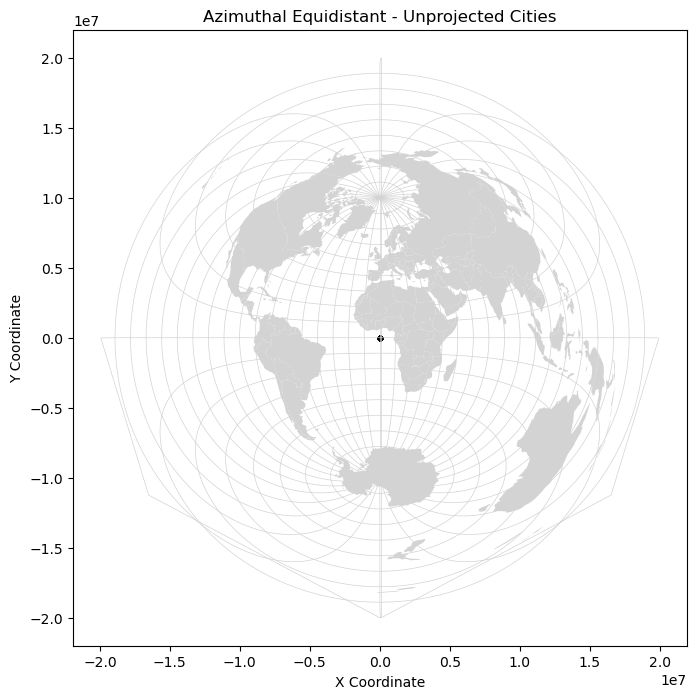

In [15]:
# Especificaciones de figura
fig, ax = plt.subplots(figsize=(10,8))

# Elementos de visualziación
world_ae.plot(ax=ax, color="lightgray")
capitals.plot(ax=ax, color="black", markersize=10, marker ="o")
graticules_ae.plot(ax=ax, color="lightgray", linewidth=0.5)

# Anotaciones y estilo
ax.set(
    xlabel="X Coordinate"
    ,ylabel="Y Coordinate"
    ,title="Azimuthal Equidistant - Unprojected Cities")

plt.show()

Observa que todo pareciera estar en orden, pero las capitales desaparecieron del mapa. Verifica su proyección cartográfica:

In [16]:
capitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

No se relizó el cambio de proyección correspondiente, por lo tanto, al efectuarlo y volver a hacer el mapa todo debería de estar en orden:

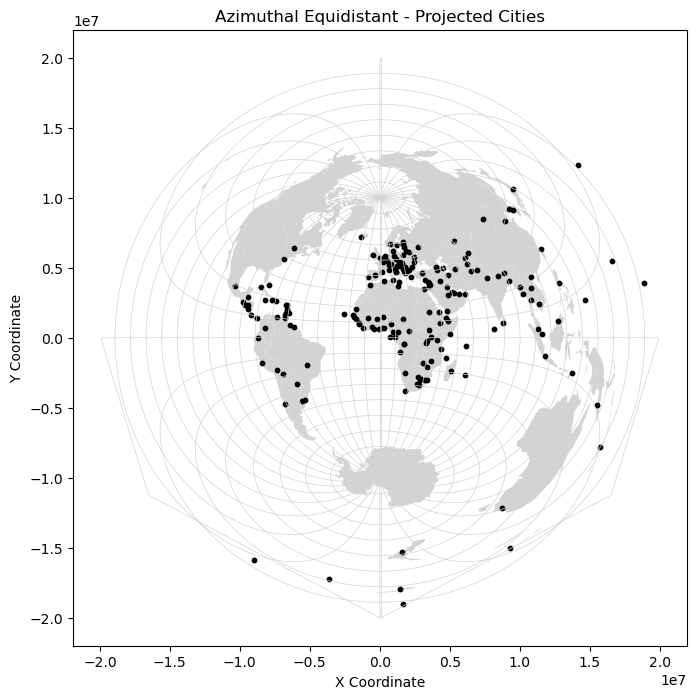

In [17]:
# Datos de visualización
capitals_ae = capitals.to_crs("ESRI:54032")

# Especificaciones de figura
fig, ax = plt.subplots(figsize=(10,8))

# Elementos de visualziación
world_ae.plot(ax=ax, color="lightgray")
capitals_ae.plot(ax=ax, color="black", markersize=10, marker ="o")
graticules_ae.plot(ax=ax, color="lightgray", linewidth=0.5)

# Anotaciones y estilo
ax.set(
    xlabel="X Coordinate"
    ,ylabel="Y Coordinate"
    ,title="Azimuthal Equidistant - Projected Cities")

plt.show()

---